# Data Collecting and Data Understanding

melakukan kolekting dataset yang diperoleh melalui platform public data yaitu kaggle menggunakan Kaggle API. dataset yang akan digunakan adalah dataset Book recommendation yang terdiri dari file user,books dan rating

In [ ]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 59% 14.0M/23.8M [00:00<00:00, 72.9MB/s]
100% 23.8M/23.8M [00:00<00:00, 92.2MB/s]


Melakukan ekstraksi dataset atau unzipping file dataset yang akan digunakan

In [ ]:
!unzip /content/book-recommendation-dataset.zip

Archive:  /content/book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


membaca data data yang telah dilakukan pengekstrakan dengan menggunakan library pandas

In [ ]:
import pandas as pd

df_book=pd.read_csv('/content/Books.csv')
df_ratings=pd.read_csv('/content/Ratings.csv')
df_user=pd.read_csv('/content/Users.csv')

<ipython-input-4-f72c2e2a9adc>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_book=pd.read_csv('/content/Books.csv')


melakukan pengecekan lima data teratas dari df_book

In [ ]:
df_book.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


melakukan pengecekan terhadap lima data teratas pada rating dataframe

In [ ]:
df_ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


melakukan pengecekan terhadap lima data teratas pada user dataframe

In [ ]:
df_user.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


melakukan pengecekan jumlah baris dan kolom pada masing masing dataframe untuk mengetahui jumlah data 

In [ ]:
df_book.shape

(271360, 8)

In [ ]:
df_ratings.shape

(1149780, 3)

In [ ]:
df_user.shape

(278858, 3)

# Data Preprocessing

melakukan pengecekan jumlah data yang memiliki missing value pada masing masing dataframe

In [ ]:
df_book.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

#

melakukan dropping data yang memiliki missing value pada df_book

In [ ]:
df_book.dropna(inplace=True)

melakukan pengecekan kembali jumlah missing value pada df_book setelah dilakukan drop

In [ ]:
df_book.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
df_book.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271354,271354,271354,271354,271354,271354,271354,271354
unique,271354,242130,102020,200,16803,271038,271038,271038
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
freq,1,27,632,13902,7535,2,2,2


dapat terlihat jika judul buku yang memiliki popularitas tertinggi adalah Selected Poems dan author dengan popularitas tertinggi adalah agatha christie

melakukan pengecekan terhadap jumlah data duplikat pada dataframe books

In [ ]:
df_book.duplicated().sum()

0

Melakukan pengecekan terhadap missig value pada ratings dataframe

In [ ]:
df_ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

melakukan pengecekan terhadap jumlah data yang memiliki duplikat pada dataframe ratings

In [ ]:
df_ratings.duplicated().sum()

0

# Popularity Based recomendation system

membentuk dataframe baru dengan menggunakan gabungan antara books dataframe dan rating dataframe

In [ ]:
df_new=df_book.merge(df_ratings,on='ISBN')
df_new.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


melakukan pengecekan jumlah kolom dan baris pada dataframe baru yang merupakan gabungan dari dataframe book dan rating

In [ ]:
df_new.shape

(1031129, 10)

membuat dataframe baru yang memuat judul buku dan nilai jumlah keseluruhan rating dengan melakukan pengelompokan berdasarkan kritera book title kemudian melakukan reset index dengan melakukan drop kolom pada df_new selain kolom Book_title dan Book-Rating

In [ ]:
df_with_counted_ratings=df_new.groupby(['Book-Title']).count().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'Counted-Rating'})
df_with_counted_ratings.head()

,Book-Title,Counted-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
df_with_counted_ratings.describe()

,Counted-Rating
count,241066.000000
mean,4.277372
std,16.738847
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2502.000000


melakukan pengecekan terhadap judul buku yang memiliki paling banyak pemberian ratings

In [ ]:
df_with_counted_ratings.nlargest(3,'Counted-Rating')

,Book-Title,Counted-Rating
234946,Wild Animus,2502
196322,The Lovely Bones: A Novel,1295
183569,The Da Vinci Code,898


ternyata judul buku yang memiliki penilaian terbanya ada pada judul Wild Animus pada urutan pertama

proses selanjutnya adalah membuat dataframe baru yang terdiri dari judul buku dan nilai rata rata rating

In [ ]:
df_with_avg_ratings=df_new.groupby(['Book-Title']).mean().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'Average-Rating'})
df_with_avg_ratings.head()

,Book-Title,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


melakukan penggabungan dataframe counted rating dan average rating berdasarkan Book-Title kemudian mengurutkan nilai dengan besaran nilai pada Counted-Rating

In [ ]:
books_sorted=df_with_counted_ratings.merge(df_with_avg_ratings,on='Book-Title').sort_values(by=['Counted-Rating'],ascending=False)
books_sorted.head(5)

,Book-Title,Counted-Rating,Average-Rating
234946,Wild Animus,2502,1.019584
196322,The Lovely Bones: A Novel,1295,4.468726
183569,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199233,The Nanny Diaries: A Novel,828,3.530193


membuat dataframe popular_books dengan menggabungkan data pada dataframe book_sorted yang memiliki nilai Counted-Rating lebih dari 500 lalu mengurutkannya berdasarkan nilai Average-Rating

In [72]:
popular_books=books_sorted[books_sorted['Counted-Rating']>500].sort_values(by=['Average-Rating'],ascending=False).head(100)
popular_books.head(10)

,Book-Title,Counted-Rating,Average-Rating
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
80443,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
219737,To Kill a Mockingbird,510,4.700000
183569,The Da Vinci Code,898,4.642539
196322,The Lovely Bones: A Novel,1295,4.468726
206498,The Secret Life of Bees,774,4.447028
204383,The Red Tent (Bestselling Backlist),723,4.334716
74748,Girl with a Pearl Earring,526,4.218631
233365,Where the Heart Is (Oprah's Book Club (Paperba...,585,4.105983
107960,Life of Pi,664,4.088855


In [ ]:
popular_books.shape

(37, 3)

mendapatkan hasil plotting sepuluh judul buku terpopuler berdasarkan nilai rata rata rating

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

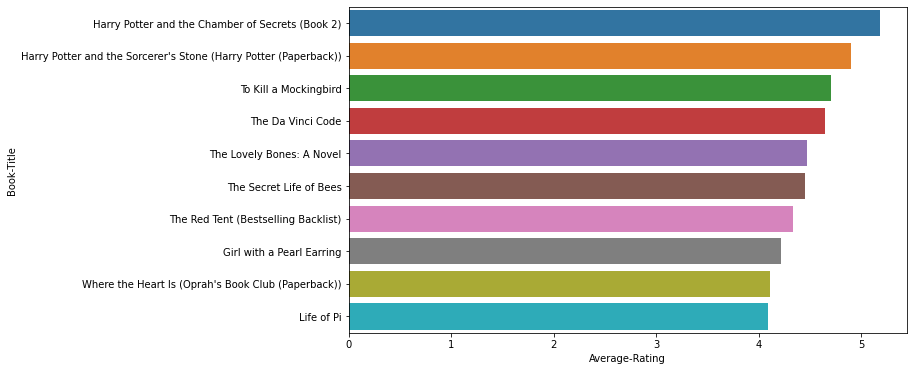

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=popular_books['Average-Rating'].head(10),y=popular_books['Book-Title'].head(10));

In [ ]:
popular_books['Book-Title'].head(10).to_frame()

,Book-Title
80412,Harry Potter and the Chamber of Secrets (Book 2)
80443,Harry Potter and the Sorcerer's Stone (Harry P...
219737,To Kill a Mockingbird
183569,The Da Vinci Code
196322,The Lovely Bones: A Novel
206498,The Secret Life of Bees
204383,The Red Tent (Bestselling Backlist)
74748,Girl with a Pearl Earring
233365,Where the Heart Is (Oprah's Book Club (Paperba...
107960,Life of Pi
